In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Create some toy data with 3 classes which are not linearly separable

In [2]:
r = np.tile(np.r_[0:1:100j],3)

t = np.r_[0:np.pi*4:300j] + np.random.rand(300)

x_train = np.c_[r*np.sin(t), r*np.cos(t)]

y_train = np.arange(3).repeat(100)

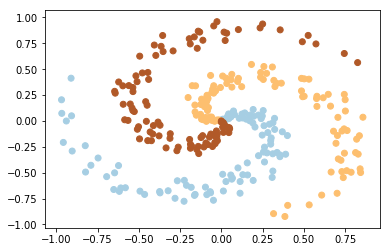

In [3]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=plt.cm.Paired)

## Create a Neural Network Model

In [4]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_layer, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_layer)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_layer, hidden_layer)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_layer, num_classes)
        
    def forward(self, X):
        out = self.fc1(X)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        
        return out
    
    def predict(self, X):
        y_score = self.forward(X)
        return torch.max(y_score, 1)[1]
    
    def plot_decision_boundary(self, X, y):
        x1_min, x2_min = X.min(0) - 0.5
        x1_max, x2_max = X.max(0) + 0.5
        x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
        xx = np.c_[x1.ravel(), x2.ravel()]
        #print(xx.shape)
        yy = self.predict(torch.from_numpy(xx.astype(np.float32)))
        #print(yy.shape)
        plt.pcolormesh(x1,x2,yy.reshape(x1.shape), cmap=plt.cm.Paired)
        plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k',cmap=plt.cm.Paired)
        plt.show()
        

In [5]:
model = NeuralNet(2, 16, 3)

In [6]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

Loss is 1.0940606594085693 at epoch 0


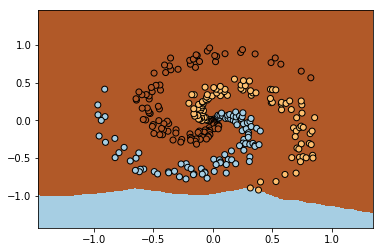

Loss is 0.9445734620094299 at epoch 1000


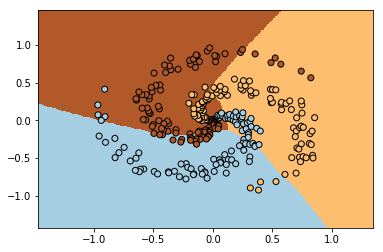

Loss is 0.757595956325531 at epoch 2000


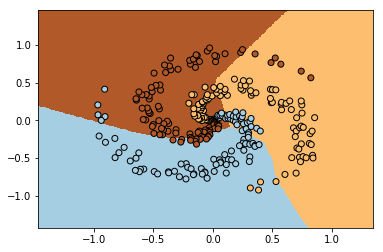

Loss is 0.6442224383354187 at epoch 3000


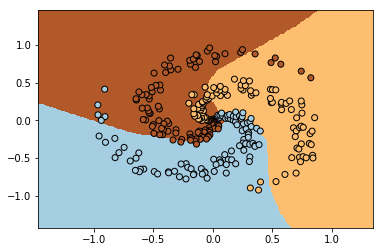

Loss is 0.5552942156791687 at epoch 4000


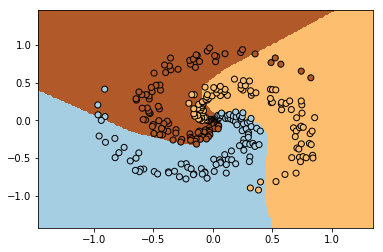

Loss is 0.4690413773059845 at epoch 5000


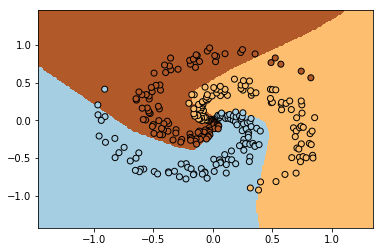

Loss is 0.3936953544616699 at epoch 6000


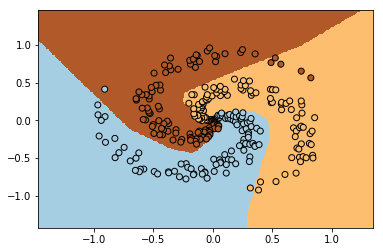

Loss is 0.32842496037483215 at epoch 7000


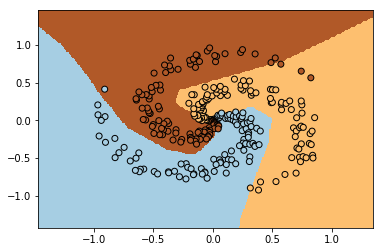

Loss is 0.27106061577796936 at epoch 8000


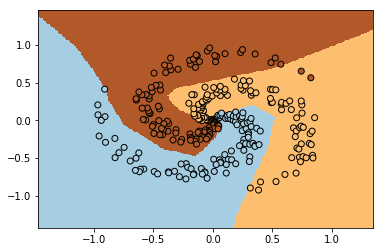

Loss is 0.21225781738758087 at epoch 9000


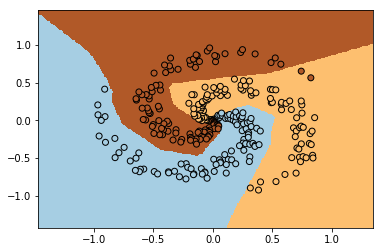

Loss is 0.16295519471168518 at epoch 10000


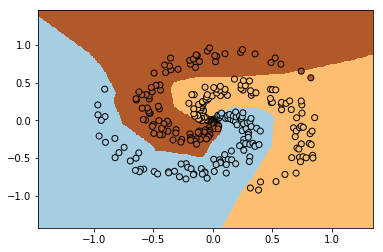

In [7]:
for epoch in range(10001):
    y_pred_score = model(torch.from_numpy(x_train.astype(np.float32)))
    loss = loss_fn(y_pred_score, torch.from_numpy(y_train.astype(np.int64)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%1000==0:
        print(f'Loss is {loss} at epoch {epoch}')
        model.plot_decision_boundary(x_train, y_train)